### Long short term memory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


2023-11-29 12:25:02.825684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
INFOSYS = pd.read_csv("INFY.NS.csv")

In [3]:
INFOSYS.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
5,2015-07-08,489.500000,489.500000,477.399994,478.750000,398.937103,7024178.0
6,2015-07-09,478.750000,483.000000,467.024994,469.000000,390.812531,8587772.0
7,2015-07-10,474.049988,476.049988,466.325012,468.750000,390.604187,7411522.0
8,2015-07-13,470.500000,477.500000,467.024994,475.075012,395.874756,6531768.0
9,2015-07-14,477.500000,486.750000,472.750000,485.625000,404.665955,5367074.0


In [4]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [5]:
 INFOSYS_NEW=INFOSYS.dropna(axis=0)
 INFOSYS_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,2020-06-23,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,2020-06-24,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,2020-06-25,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,2020-06-26,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [6]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [7]:
INFOSYS_NEW['Close']=pd.to_numeric(INFOSYS_NEW.Close,errors='coerce')
INFOSYS_NEW = INFOSYS_NEW.dropna()
INFOSYS_TRAIN = INFOSYS_NEW.iloc[:,4:5].values

/tmp/ipykernel_6861/910588300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INFOSYS_NEW['Close']=pd.to_numeric(INFOSYS_NEW.Close,errors='coerce')


In [8]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
INFOSYS_TRAIN = sc.fit_transform(INFOSYS_TRAIN)
INFOSYS_TRAIN.shape

(1227, 1)

In [10]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(INFOSYS_TRAIN[i-60:i,0])
  y_train.append(INFOSYS_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2023-11-29 12:25:07.129685: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-11-29 12:25:07.718961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-29 12:25:07.722757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-29 12:25:07.7

In [13]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20


2023-11-29 12:25:10.075130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-29 12:25:10.078941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-29 12:25:10.082073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

37/37 - 31s - loss: 0.0252 - 31s/epoch - 828ms/step
Epoch 2/20
37/37 - 16s - loss: 0.0072 - 16s/epoch - 429ms/step
Epoch 3/20
37/37 - 17s - loss: 0.0068 - 17s/epoch - 469ms/step
Epoch 4/20
37/37 - 17s - loss: 0.0065 - 17s/epoch - 448ms/step
Epoch 5/20
37/37 - 16s - loss: 0.0064 - 16s/epoch - 427ms/step
Epoch 6/20
37/37 - 16s - loss: 0.0058 - 16s/epoch - 438ms/step
Epoch 7/20
37/37 - 16s - loss: 0.0049 - 16s/epoch - 427ms/step
Epoch 8/20
37/37 - 19s - loss: 0.0048 - 19s/epoch - 517ms/step
Epoch 9/20
37/37 - 16s - loss: 0.0050 - 16s/epoch - 436ms/step
Epoch 10/20
37/37 - 16s - loss: 0.0046 - 16s/epoch - 436ms/step
Epoch 11/20
37/37 - 16s - loss: 0.0050 - 16s/epoch - 446ms/step
Epoch 12/20
37/37 - 15s - loss: 0.0055 - 15s/epoch - 418ms/step
Epoch 13/20
37/37 - 16s - loss: 0.0048 - 16s/epoch - 422ms/step
Epoch 14/20
37/37 - 16s - loss: 0.0042 - 16s/epoch - 433ms/step
Epoch 15/20
37/37 - 16s - loss: 0.0053 - 16s/epoch - 419ms/step
Epoch 16/20
37/37 - 15s - loss: 0.0041 - 15s/epoch - 400ms/s

In [14]:
INFOSYS_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
INFOSYS_TEST = pd.read_csv("INFY.NS.csv")
INFOSYS_TEST["Close"]=pd.to_numeric(INFOSYS_TEST.Close, errors='coerce')
INFOSYS_TEST = INFOSYS_TEST.dropna()
INFOSYS_TEST = INFOSYS_TEST.iloc[:,4:5]
y_test = INFOSYS_TEST.iloc[60:,0:].values

inputClosing = INFOSYS_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(INFOSYS_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape




(1167, 60, 1)

In [16]:
y_predict = model.predict(x_test)
y_predict

2023-11-29 12:30:47.544000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-29 12:30:47.547116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-29 12:30:47.550670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

37/37 [==============================] - 9s 166ms/step


array([[0.28713283],
       [0.292078  ],
       [0.29641405],
       ...,
       [0.65923357],
       [0.66428703],
       [0.6732947 ]], dtype=float32)

In [17]:
predicted_price = sc.inverse_transform(y_predict)

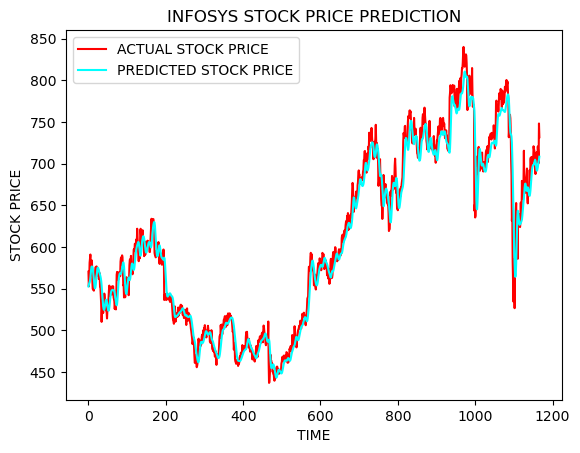

In [18]:
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='cyan', label='PREDICTED STOCK PRICE')
plt.title('INFOSYS STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error

# Assuming 'y_test' and 'predicted_price' are your actual and predicted stock prices
# Replace them with your actual variable names if they are different

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_price)

# Calculate Accuracy as a percentage (using relative error)
accuracy_percentage = (1 - mae / np.mean(y_test)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Accuracy: {accuracy_percentage:.2f}%')

Mean Absolute Error (MAE): 13.246749398315323
Accuracy: 97.82%


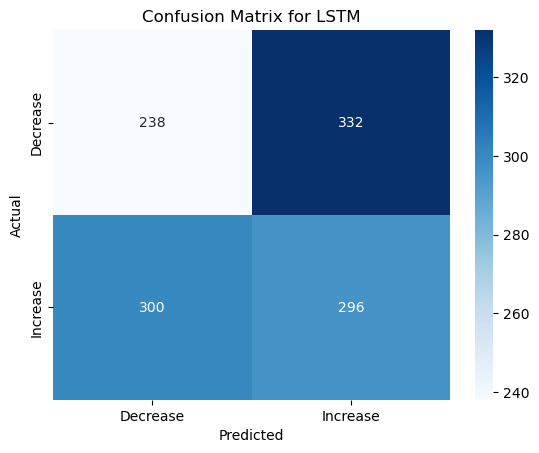

In [27]:
from sklearn.metrics import confusion_matrix
predicted_direction = np.where(np.diff(predicted_price.flatten()) > 0, 1, 0)

# Convert actual prices to binary values
actual_direction = np.where(np.diff(INFOSYS_TEST['Close'].values[60:]) > 0, 1, 0)

# Create confusion matrix
cm = confusion_matrix(actual_direction, predicted_direction)

# Visualize confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
